In [87]:
from random import randint

def get_coords(k):
    coords = [(randint(1,k),randint(1,k)) for i in range(1,k)]
    return list(set(coords))



In [88]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

# Set random seed
np.random.seed(2)

def get_data(algorithm, run_times, coords_list, **args):
    state = []
    fit = []
    dur = []
    for n in [1]:
        start_time = datetime.now()
        fitness_coords = mlrose.TravellingSales(coords = coords_list)
        problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize=True)
        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)


run_times=1


# coords_list = get_coords(50)

# def by_max_iters(algorithm, run_times, max_iters, **args):
#     fit = []
#     dur = []
#     for i in max_iters:
#         _fit, _dur = get_data(algorithm, run_times,coords_list, max_iters=i, **args)
#         fit.append(_fit)
#         dur.append(_dur)
#     return fit,dur


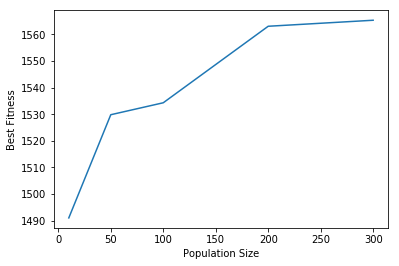

In [83]:
# Optimization

coords_list = get_coords(50)
# Set random seed
np.random.seed(2)

params = [10,50,100,200,300]
def optimize(algorithm, run_times, **args):
    fit = []
    dur = []  
    for i in params:
        _fit, _dur = get_data(algorithm, run_times, coords_list, pop_size=i, mutation_prob=0.1, max_attempts=50, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

fit_ga, dur_ga = optimize(mlrose.genetic_alg, 3)
plt.xlabel('Population Size')
plt.ylabel('Best Fitness')
plt.plot(params, fit_ga)



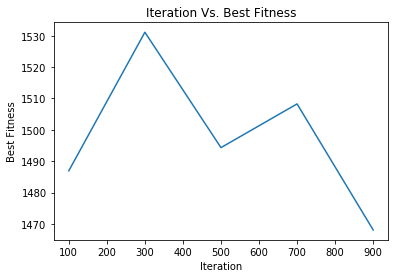

In [70]:
fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters, pop_size=200, mutation_prob=0.3, max_attempts=50)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

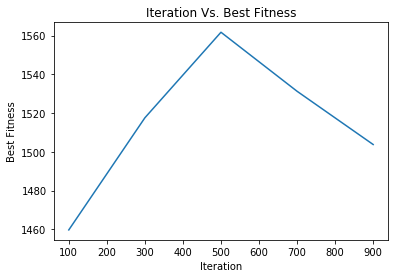

In [71]:
fit_rhc, dur_rhc = by_max_iters(mlrose.random_hill_climb, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_rhc)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

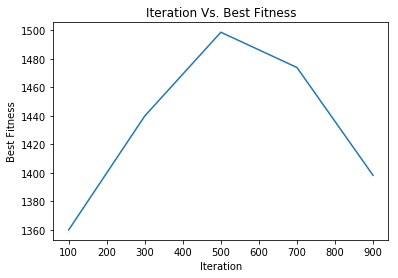

In [72]:
fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

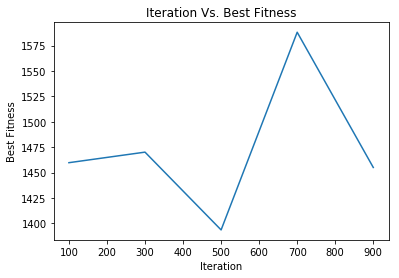

In [73]:
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

                ga            rhc             sa          mimic
100     451.896253     430.232780     415.882958     450.113190
300    1517.047418    1486.338675    1630.656199    1423.652666
500    6211.571900    5972.383119    6560.833059    5902.864989
700   23780.626039   25878.669626   24530.621845   25704.710415
900  138215.281766  141197.761425  135806.907547  148192.555692


Text(0, 0.5, 'Best Fitness')

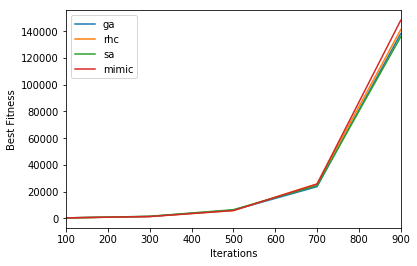

In [76]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_rhc,fit_sa,fit_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,fit_rhc,dur_sa,dur_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
print(fitness_df)

fig, ax = plt.subplots()
fitness_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")

In [94]:
np.random.seed(2)
coords_lists = [get_coords(i) for i in [100,200,500]]
coords_list_len = [len(i) for i in coords_lists]

def by_coords(algorithm, run_times, coords_lists, **args):
    fit = []
    dur = []  
    for coords_list in coords_lists:
        _fit, _dur = get_data(algorithm, run_times, coords_list, max_iters=20000, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

fit_ga, dur_ga = by_coords(mlrose.genetic_alg, run_times, coords_lists, pop_size=500, mutation_prob=0.2)
fit_rhc, dur_rhc = by_coords(mlrose.random_hill_climb, run_times, coords_lists)
fit_sa, dur_sa = by_coords(mlrose.simulated_annealing, run_times, coords_lists)
fit_mi, dur_mi = by_coords(mlrose.simulated_annealing, run_times, coords_lists)



Text(0, 0.5, 'Best Fitness')

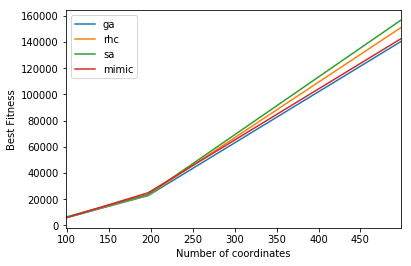

In [93]:
plt.close()
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_rhc,fit_sa,fit_mi]),columns=['ga','rhc','sa','mimic'],index=coords_list_len)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_rhc,dur_sa,dur_mi]),columns=['ga','rhc','sa','mimic'],index=coords_list_len)
fitness_df.plot()
plt.xlabel('Number of coordinates')
plt.ylabel('Best Fitness')

In [85]:
max_iters=range(100, 1000, 100)
coords_list = get_coords(100)

# Set random seed
np.random.seed(2)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times,coords_list, max_iters=i, max_attempts=10, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters, pop_size=200, mutation_prob=0.1)
fit_rhc, dur_rhc = by_max_iters(mlrose.random_hill_climb, run_times, max_iters)
fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters)
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters)

fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_rhc,fit_sa,fit_mi]),columns=['ga','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,fit_rhc,dur_sa,dur_mi]),columns=['ga','sa','mimic'],index=max_iters)
print(fitness_df)

fig, ax = plt.subplots()
fitness_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")

ValueError: math domain error